## **Group - 17**

*Group Members:* M Ashish, Nishanth A

*Topic:* Fetal Health Classification using Cardiotography features

*Datset Name:* Fetal Health Classification

*Technique:* Logistic Regression


**Abstract:**

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is used to monitor fetal well-being and allows early detection of fetal distress.The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

CTG interpretation helps in determining if the pregnancy poses a higher or lower risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, we have created a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

**Dataset description**

* Link to the dataset - https://www.kaggle.com/andrewmvd/fetal-health-classification
* Data consists of 22 features spanning over 2126 entries.
* The data consists of multiple classes, specifically 3 classes
* The three target classes are -  normal, suspect and pathological

## Explanatory data analysis

In [ ]:
import json
json_key = {"username":"successreaper","key":"0c1fafa6fcced1b5c0987144a18a5d9b"}
with open("kaggle.json",'w') as file:
  json.dump(json_key,file)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/fetal-health-classification
!unzip -q fetal-health-classification.zip

fetal-health-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
replace fetal_health.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import multiprocessing


from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score,accuracy_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
import imblearn.pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data = pd.read_csv("fetal_health.csv")
data.drop_duplicates(keep = 'first', inplace = True)
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,8.166635,70.535258,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,5.632912,39.007706,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.isna().sum(axis = 0)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

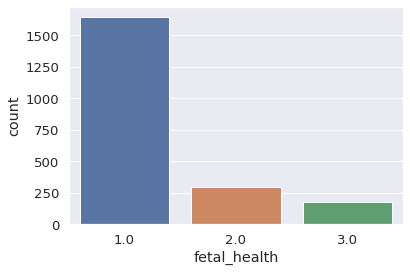

In [ ]:
sns.countplot(data = data, x = 'fetal_health')

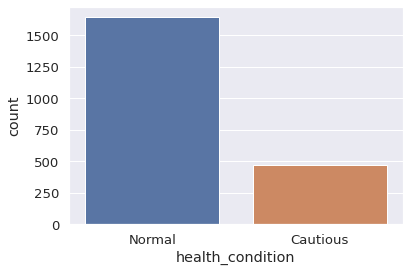

In [ ]:
bins = (0, 1.0, 3.0)
bin_names = ['Normal', 'Cautious']
data['health_condition'] = pd.cut(data['fetal_health'], bins = bins, labels = bin_names)
sns.countplot(data = data, x = 'health_condition')

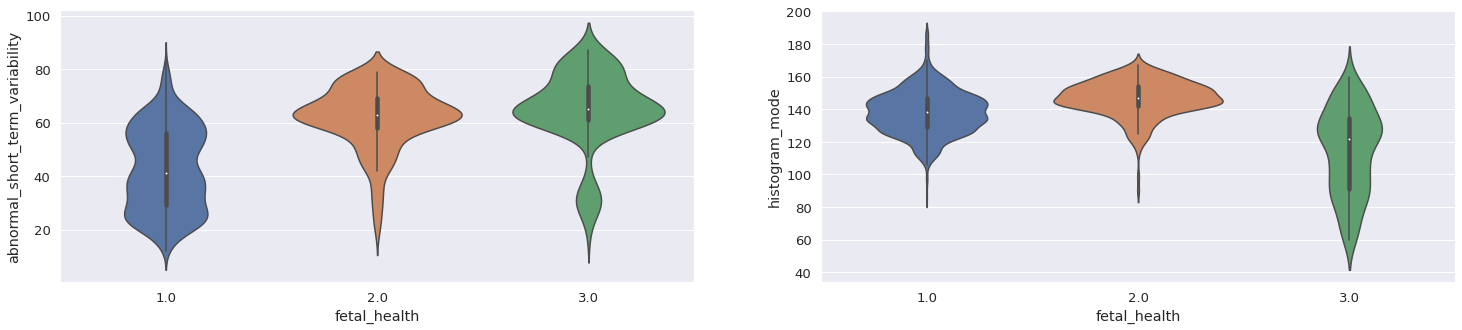

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data = data,y='abnormal_short_term_variability',x = 'fetal_health',palette = "deep",ax = ax[0]);
sns.violinplot(data = data,y='histogram_mode',x = 'fetal_health',palette = "deep",ax = ax[1]);

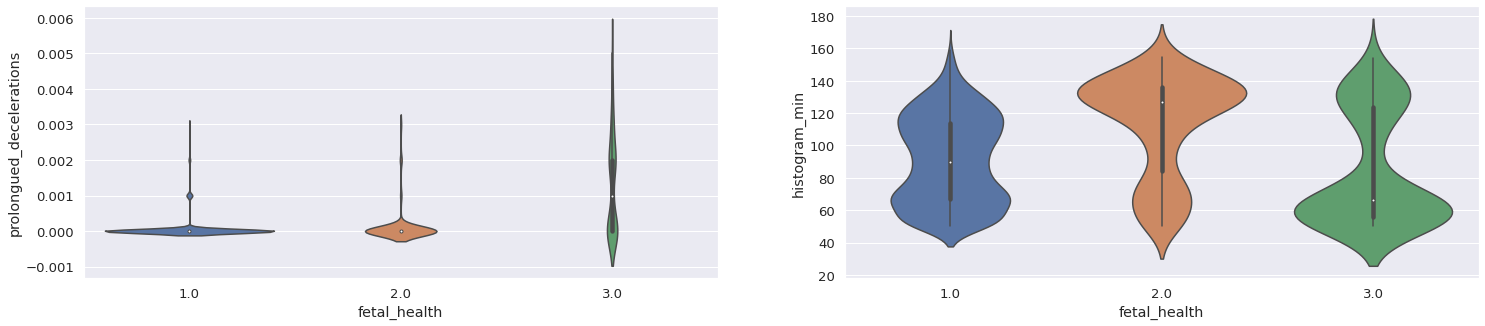

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data=data,y='prolongued_decelerations',x='fetal_health',palette="deep",ax=ax[0])
sns.violinplot(data=data,y='histogram_min',x='fetal_health',palette="deep",ax=ax[1])

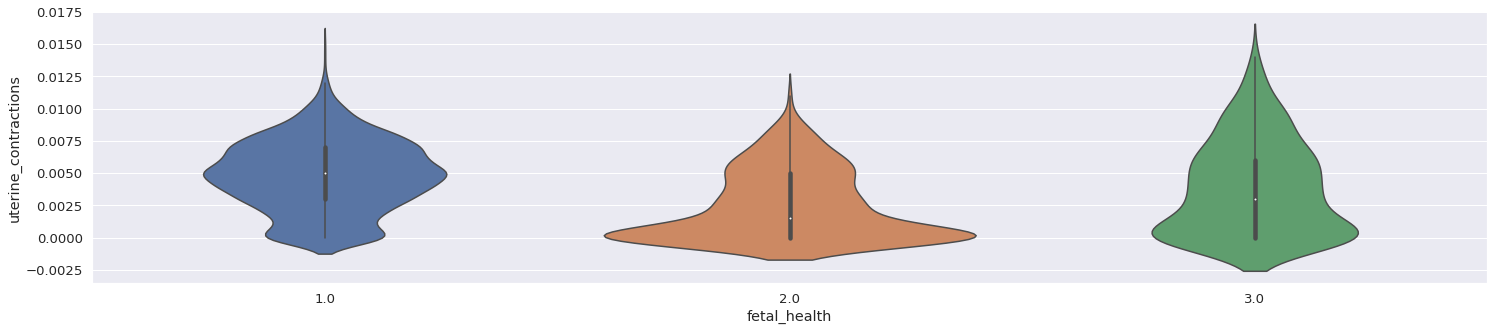

In [ ]:
fig, ax =plt.subplots(figsize=(25,5))
sns.violinplot(data=data,y='uterine_contractions',x='fetal_health',palette="deep")

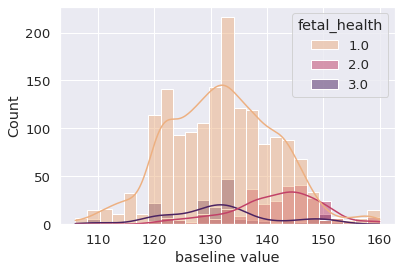

In [ ]:
sns.histplot(data, x = "baseline value",hue = "fetal_health",kde = True,palette = "flare")

### Insights

* In feature abnormal_short_term_variability majority of the suspected and Pathological points are around 60 and greater than 60.
* In feature histogram_mode it is little difficult seperate normal and suspected as they are in almost same distribution.
* In feature prolongued_decelerations, Normal and suspected values are around 0, but Pathological are distributed.
* Again I don't see any specific pattern in histogram_min
* In feature uterine_contractions, Most of the points in suspected and Pathological lies around 0, Most important is that there is little proper sepration for suspected class.

### Correlation Heatmap matrix

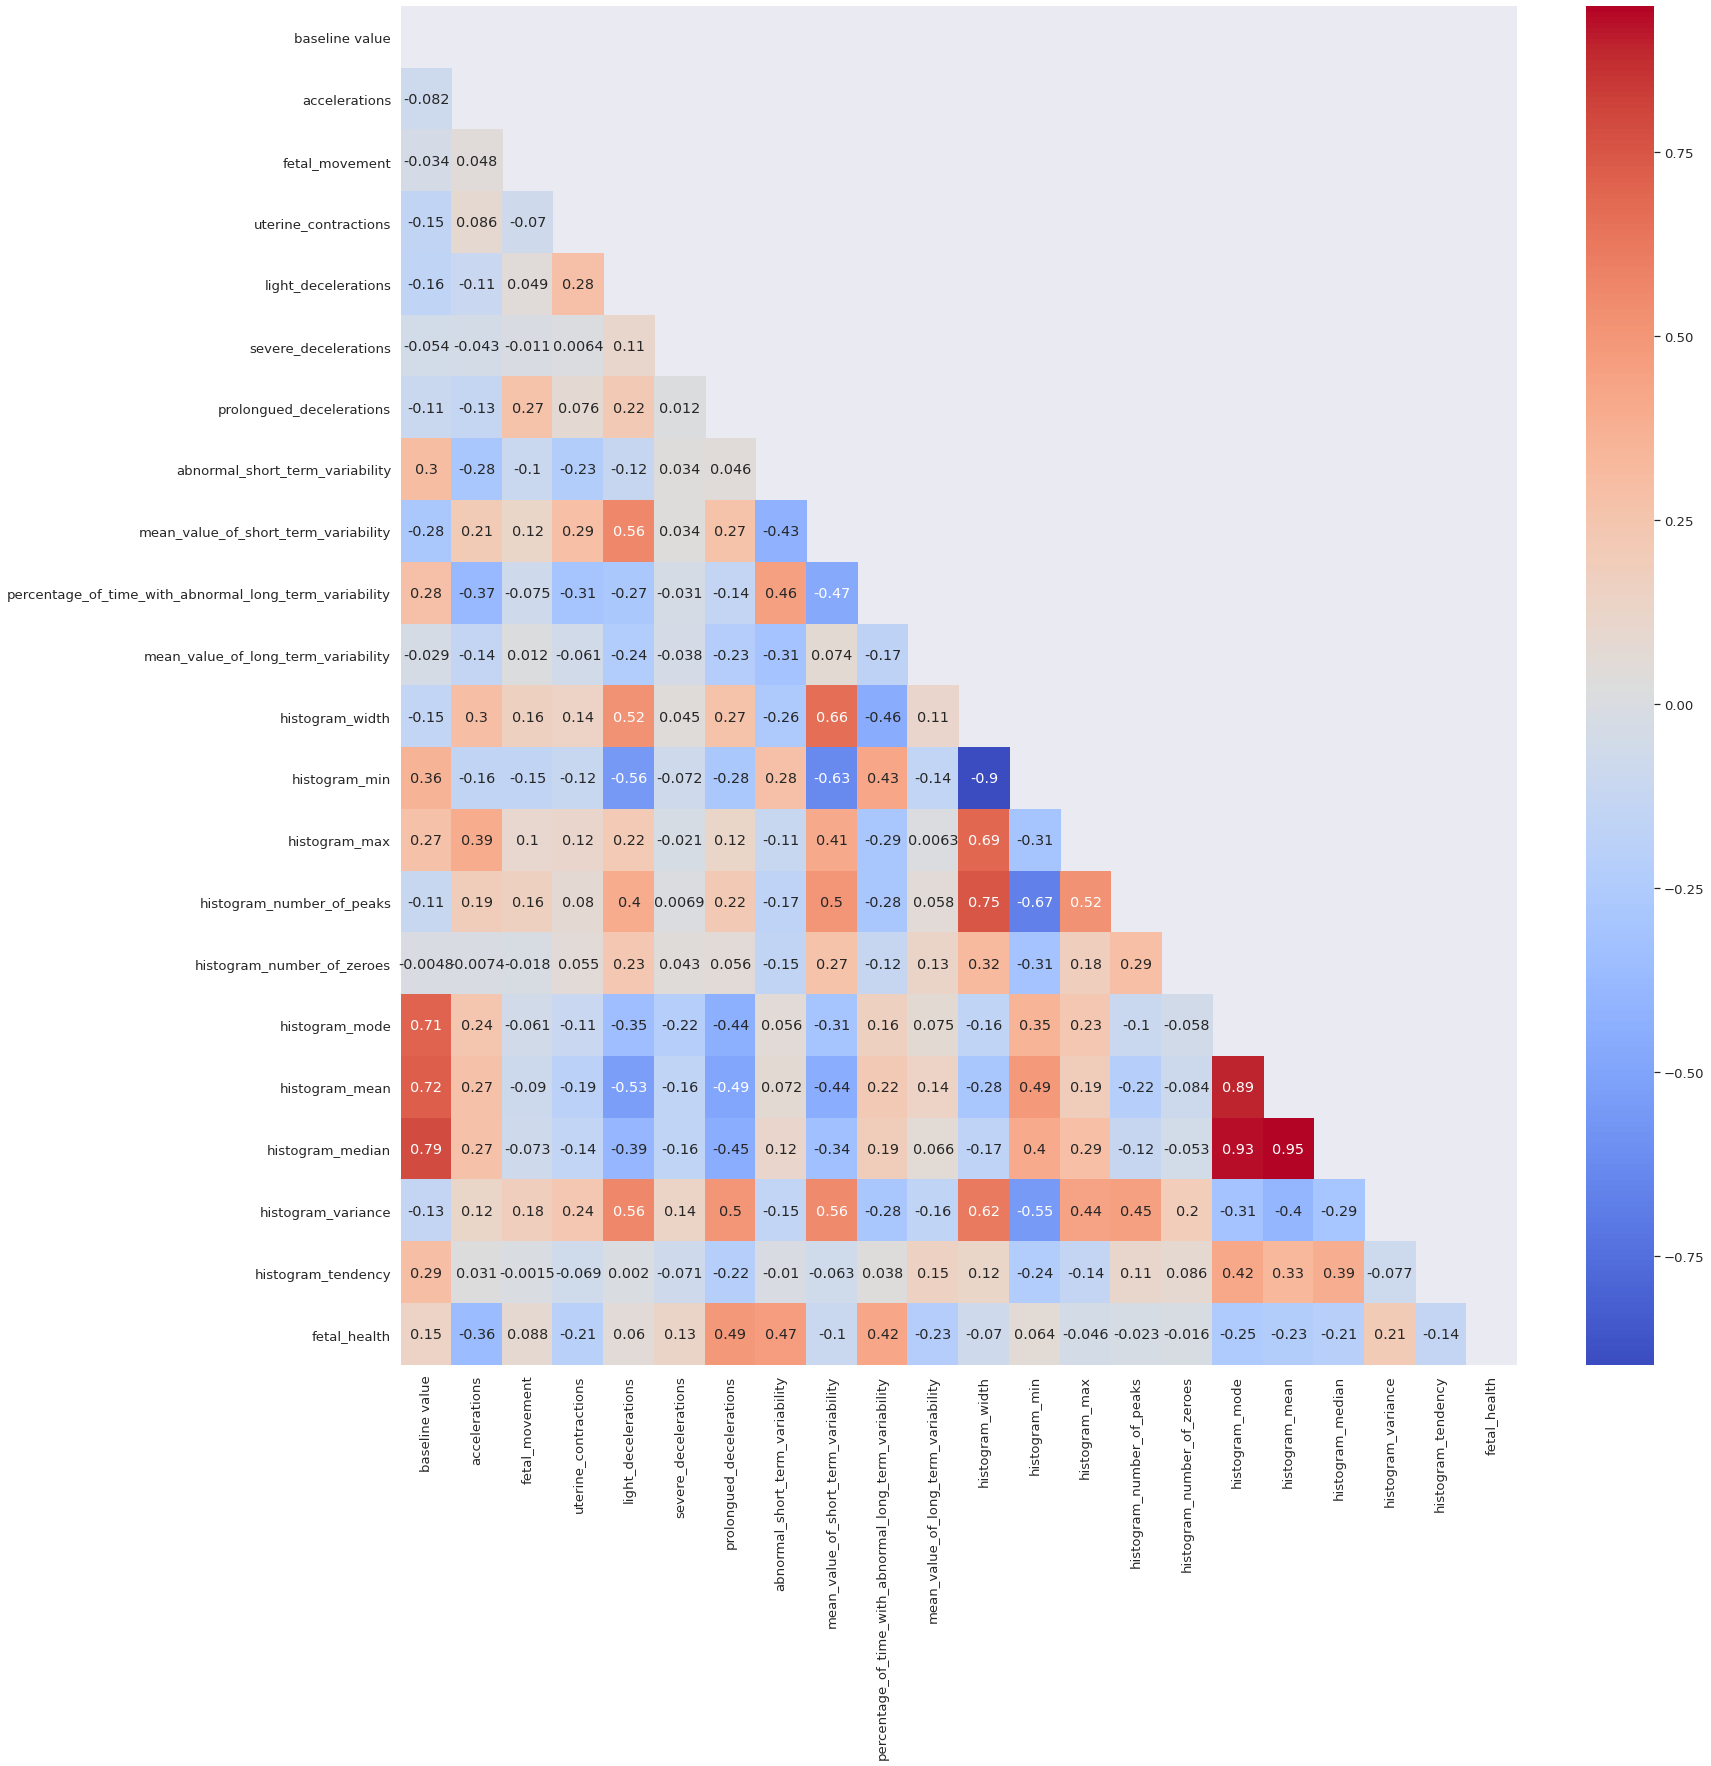

In [ ]:
plt.figure(figsize = (25,25))
sns.set(font_scale = 1.2)
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
corr_heatmap = sns.heatmap(data.corr(),mask = mask,cmap = "coolwarm",annot=True)
corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), rotation=90) 
plt.show()

## Model training and Results

### Logistic Regression Model

In [ ]:
X = data.drop(["fetal_health","health_condition"],axis=1)
y = data["fetal_health"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = data["fetal_health"])
skf = StratifiedKFold(n_splits = 3,shuffle = True, random_state = 42)

In [ ]:
class Passthrough(BaseEstimator,TransformerMixin):
  def fit(self,X,y = None):
    return self
  def transform(self,X):
    return X

In [ ]:
steps = []
steps.append(("standard_scaler",StandardScaler()))
steps.append(("upsample",SMOTE()))
steps.append(("logistic_regression",LogisticRegression(max_iter = 1500,class_weight = "balanced",solver = "saga",)))
smote_model = imblearn.pipeline.Pipeline(steps=steps)

The “balanced” mode in LogisticRegression() uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as 
`n_samples / (n_classes * np.bincount(y))`



In [ ]:
# Weights assigned using class_weight = "balanced"
print(X_train.shape[0]/(3 * np.bincount(y_train)[1:]))

[0.42806484 2.40740741 4.02380952]


In [ ]:
param_grid = [dict(upsample = [Passthrough(),SMOTE(random_state = 42),RandomUnderSampler(random_state=42, replacement=True),RandomOverSampler(random_state=42)],\
                   logistic_regression__penalty = ["l1", "l2","elasticnet","none"],\
                  logistic_regression__C = np.linspace(0.1,1000,15),logistic_regression__l1_ratio = [0.4,0.5])]
              
n_jobs = multiprocessing.cpu_count() - 1
grid_search = GridSearchCV(smote_model,param_grid,\
                           scoring = ["f1_weighted",'neg_mean_absolute_error','neg_mean_squared_error','r2',"accuracy"]\
                           ,cv = skf,return_train_score = True,refit = "f1_weighted",n_jobs = n_jobs)

grid_search.fit(X_train,y_train)
cvres = grid_search.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pe

In [ ]:
joblib.dump(grid_search.best_estimator_,"logistic_model_new.joblib")

['logistic_model_new.joblib']

In [ ]:
print(grid_search.best_params_)
index = grid_search.best_index_
print("\n")
test_f1, train_f1, test_mae, train_mae, test_mse, train_mse, test_r2, train_r2, test_acc, train_acc\
                                      = cvres["mean_test_f1_weighted"][index],cvres["mean_train_f1_weighted"][index]\
                                      ,cvres["mean_test_neg_mean_absolute_error"][index],cvres["mean_train_neg_mean_absolute_error"][index]\
                                      ,cvres["mean_test_neg_mean_squared_error"][index],cvres["mean_train_neg_mean_squared_error"][index]\
                                      ,cvres["mean_test_r2"][index],cvres["mean_train_r2"][index]\
                                      ,cvres["mean_test_accuracy"][index],cvres["mean_train_accuracy"][index]
  
print(f"Train Scores -> F1 score: {train_f1}, MAE :{-train_mae}, RMSE: {np.sqrt(-train_mse)}, R^2: {train_r2}, Accuracy: {train_acc} ;\n\
Validation Scores -> F1 score:{test_f1}, MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)}, R^2: {test_r2}, Accuracy: {test_acc} ")

{'logistic_regression__C': 0.1, 'logistic_regression__l1_ratio': 0.4, 'logistic_regression__penalty': 'none', 'upsample': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')}


Train Scores -> F1 score: 0.897892648816701, MAE :0.1230828110068647, RMSE: 0.38769153673007034, R^2: 0.6015815339032051, Accuracy: 0.8905281473157647 ;
Validation Scores -> F1 score:0.8864450267241629, MAE:0.13787691739205288, RMSE:0.4135355312094569, R^2: 0.5465228446279017, Accuracy: 0.8786904416982645 


In [ ]:
for test_f1, train_f1, test_mae, train_mae, test_mse, train_mse, test_r2, train_r2,test_acc,train_acc, params in\
                                      zip(cvres["mean_test_f1_weighted"],cvres["mean_train_f1_weighted"]\
                                      ,cvres["mean_test_neg_mean_absolute_error"],cvres["mean_train_neg_mean_absolute_error"]\
                                      ,cvres["mean_test_neg_mean_squared_error"],cvres["mean_train_neg_mean_squared_error"]\
                                      ,cvres["mean_test_r2"],cvres["mean_train_r2"]\
                                      ,cvres["mean_test_accuracy"],cvres["mean_train_accuracy"],cvres["params"]):
  
  print(params,"\n")

  print(f"Train Scores -> F1 score: {train_f1}, MAE :{-train_mae}, RMSE: {np.sqrt(-train_mse)}, R^2: {train_r2}, Accuracy: {train_acc} ;\n\
Validation Scores -> F1 score:{test_f1}, MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)}, R^2: {test_r2}, Accuracy: {test_acc} ")
  
  print("-"*170)

{'logistic_regression__C': 0.1, 'logistic_regression__l1_ratio': 0.4, 'logistic_regression__penalty': 'l1', 'upsample': Passthrough()} 

Train Scores -> F1 score: 0.8804489082785746, MAE :0.15059524466207827, RMSE: 0.4381983818762061, R^2: 0.4909928454871045, Accuracy: 0.8701160439463452 ;
Validation Scores -> F1 score:0.8774665182247415, MAE:0.15503634279379716, RMSE:0.445892202753544, R^2: 0.4727671444424777, Accuracy: 0.8668554140475081 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{'logistic_regression__C': 0.1, 'logistic_regression__l1_ratio': 0.4, 'logistic_regression__penalty': 'l1', 'upsample': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')} 

Train Scores -> F1 score: 0.8869349263305608, MAE :0.13994566859101

In [ ]:
print("Cross validation score: ",grid_search.best_score_)

Cross validation score:  0.8785729340042748


### Support Vector Machine

In [ ]:
steps = []
steps.append(("standard_scaler",StandardScaler()))
steps.append(("upsample",SMOTE()))
steps.append(("svm",SVC(random_state = 42,class_weight = "balanced")))
svm_model = imblearn.pipeline.Pipeline(steps=steps)

In [ ]:
param_grid = dict(upsample = [Passthrough(),SMOTE(random_state = 42),RandomUnderSampler(random_state=42, replacement=True),RandomOverSampler(random_state=42)],\
                  svm__kernel = ['linear', 'poly', 'rbf', 'sigmoid'],svm__degree = np.linspace(0,21,21))

grid_search_svm = GridSearchCV(svm_model,param_grid = param_grid,scoring =["f1_weighted",'neg_mean_absolute_error','neg_mean_squared_error'\
                                                                           ,'accuracy','precision_weighted','recall_weighted']\
                                                                           ,cv = skf,return_train_score = True,refit = "f1_weighted",verbose = 2)

grid_search_svm.fit(X_train,y_train)
cvres_svm = grid_search_svm.cv_results_

Fitting 3 folds for each of 336 candidates, totalling 1008 fits
[CV] svm__degree=0.0, svm__kernel=linear, upsample=Passthrough() .....
[CV]  svm__degree=0.0, svm__kernel=linear, upsample=Passthrough(), total=   0.0s
[CV] svm__degree=0.0, svm__kernel=linear, upsample=Passthrough() .....
[CV]  svm__degree=0.0, svm__kernel=linear, upsample=Passthrough(), total=   0.0s
[CV] svm__degree=0.0, svm__kernel=linear, upsample=Passthrough() .....
[CV]  svm__degree=0.0, svm__kernel=linear, upsample=Passthrough(), total=   0.0s
[CV] svm__degree=0.0, svm__kernel=linear, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__degree=0.0, svm__kernel=linear, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=linear, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 
[CV]  svm__degree=0.0, svm__kernel=linear, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=linear, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

[CV]  svm__degree=0.0, svm__kernel=poly, upsample=Passthrough(), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=Passthrough() .......
[CV]  svm__degree=0.0, svm__kernel=poly, upsample=Passthrough(), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

[CV]  svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   0.3s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   0.3s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

[CV]  svm__degree=0.0, svm__kernel=poly, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   0.3s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=RandomUnderSampler(random_state=42, ratio=None, replacement=True,
                   return_indices=False, sampling_strategy='auto') 
[CV]  svm__degree=0.0, svm__kernel=poly, upsample=RandomUnderSampler(random_state=42, ratio=None, replacement=True,
                   return_indices=False, sampling_strategy='auto'), total=   0.0s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=RandomUnderSampler(random_state=42, ratio=None, replacement=True,
                   return_indices=False, sampling_strategy='auto') 
[CV]  svm__degree=0.0, svm__kernel=poly, upsample=RandomUnderSampler(random_state=42, ratio=None, replacement=True,
                   return_indices=False, sampling_strategy='a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=0.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.4s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=0.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=0.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=0.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough() ........
[CV]  svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough(), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough() ........
[CV]  svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough(), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough() ........
[CV]  svm__degree=0.0, svm__kernel=rbf, upsample=Passthrough(), total=   0.1s
[CV] svm__degree=0.0, svm__kernel=rbf, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 
[CV]  svm__degree=0.0, svm__kernel=rbf, upsample=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      o

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=13.65, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.2s
[CV] svm__degree=13.65, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=13.65, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=13.65, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=13.65, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.2s
[CV] svm__degree=13.65, svm__kernel=rbf, upsample=Passthrough() ......
[CV]  svm__degree=13.65, svm__kernel=rbf, upsample=Passthro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=14.700000000000001, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=14.700000000000001, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=14.700000000000001, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=14.700000000000001, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=14.700000000000001, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=14.700000000000001, svm__kernel=rbf, upsample=Pa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=15.75, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=15.75, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=15.75, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=15.75, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=15.75, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=15.75, svm__kernel=rbf, upsample=Passthrough() ......
[CV]  svm__degree=15.75, svm__kernel=rbf, upsample=Passthro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=16.8, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=16.8, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=16.8, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=16.8, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=16.8, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=16.8, svm__kernel=rbf, upsample=Passthrough() .......
[CV]  svm__degree=16.8, svm__kernel=rbf, upsample=Passthrough(),

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=17.85, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=17.85, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=17.85, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=17.85, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=17.85, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=17.85, svm__kernel=rbf, upsample=Passthrough() ......
[CV]  svm__degree=17.85, svm__kernel=rbf, upsample=Passthro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=18.900000000000002, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=18.900000000000002, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=18.900000000000002, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=18.900000000000002, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=18.900000000000002, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=18.900000000000002, svm__kernel=rbf, upsample=Pa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=19.95, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=19.95, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=19.95, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=19.95, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=19.95, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=19.95, svm__kernel=rbf, upsample=Passthrough() ......
[CV]  svm__degree=19.95, svm__kernel=rbf, upsample=Passthro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  svm__degree=21.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=21.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=21.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=21.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') 
[CV]  svm__degree=21.0, svm__kernel=poly, upsample=RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto'), total=   0.3s
[CV] svm__degree=21.0, svm__kernel=rbf, upsample=Passthrough() .......
[CV]  svm__degree=21.0, svm__kernel=rbf, upsample=Passthrough(),

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  2.9min finished


In [ ]:
joblib.dump(grid_search_svm.best_estimator_,"svm_model_new.joblib")

['svm_model_new.joblib']

In [ ]:
print(grid_search_svm.best_params_)
index = grid_search_svm.best_index_
print("\n")
test_f1, train_f1, test_mae, train_mae, test_mse, train_mse, test_acc, train_acc, test_prec, train_prec, test_reca, train_reca\
                                     = cvres_svm["mean_test_f1_weighted"][index],cvres_svm["mean_train_f1_weighted"][index]\
                                      ,cvres_svm["mean_test_neg_mean_absolute_error"][index],cvres_svm["mean_train_neg_mean_absolute_error"][index]\
                                      ,cvres_svm["mean_test_neg_mean_squared_error"][index],cvres_svm["mean_train_neg_mean_squared_error"][index]\
                                      ,cvres_svm["mean_test_accuracy"][index],cvres_svm["mean_train_accuracy"][index]\
                                      ,cvres_svm["mean_test_precision_weighted"][index],cvres_svm["mean_train_precision_weighted"][index]\
                                      ,cvres_svm["mean_test_recall_weighted"][index],cvres_svm["mean_train_recall_weighted"][index]
  
print(f"Train Scores -> MAE  :{-train_mae}, RMSE: {np.sqrt(-train_mse)}, Accuracy: {train_acc},\
 Precision: {train_prec}, Recall: {train_reca}, F1 score: {train_f1} ;\n\
Validation Scores ->  MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)}, Accuracy: {test_acc},\
 Precision: {test_prec}, Recall: {test_reca}, F1 score: {test_f1} ")

{'svm__degree': 3.1500000000000004, 'svm__kernel': 'poly', 'upsample': Passthrough()}


Train Scores -> MAE  :0.07662714479567408, RMSE: 0.2873049433605992, Accuracy: 0.9263313480462075, Precision: 0.9395451399230642, Recall: 0.9263313480462075, F1 score: 0.9301630070139719 ;
Validation Scores ->  MAE:0.1130185304158321, RMSE:0.36487544220303003, Accuracy: 0.8970392485376801, Precision: 0.9095115655376143, Recall: 0.8970392485376801, F1 score: 0.9014318594462218 


In [ ]:
for test_f1, train_f1, test_mae, train_mae, test_mse, train_mse, test_acc, train_acc, test_prec, train_prec, test_reca, train_reca, params\
                                       in zip(cvres_svm["mean_test_f1_weighted"],cvres_svm["mean_train_f1_weighted"]\
                                      ,cvres_svm["mean_test_neg_mean_absolute_error"],cvres_svm["mean_train_neg_mean_absolute_error"]\
                                      ,cvres_svm["mean_test_neg_mean_squared_error"],cvres_svm["mean_train_neg_mean_squared_error"]\
                                      ,cvres_svm["mean_test_accuracy"],cvres_svm["mean_train_accuracy"]\
                                      ,cvres_svm["mean_test_precision_weighted"],cvres_svm["mean_train_precision_weighted"]\
                                      ,cvres_svm["mean_test_recall_weighted"],cvres_svm["mean_train_recall_weighted"],cvres_svm["params"]):
  
  print("\n",params)

  print(f"Train Scores -> MAE  :{-train_mae}, RMSE: {np.sqrt(-train_mse)}, Accuracy: {train_acc},\
  Precision: {train_prec}, Recall: {train_reca}, F1 score: {train_f1} ;\n\
  Validation Scores ->  MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)}, Accuracy: {test_acc},\
  Precision: {test_prec}, Recall: {test_reca}, F1 score: {test_f1} ")
  
  print("-"*170)


 {'svm__degree': 0.0, 'svm__kernel': 'linear', 'upsample': Passthrough()}
Train Scores -> MAE  :0.12337253999599684, RMSE: 0.37645127620810753, Accuracy: 0.8857989716853613,  Precision: 0.9204349115824354, Recall: 0.8857989716853613, F1 score: 0.8953583167487609 ;
  Validation Scores ->  MAE:0.15561056313484414, RMSE:0.4425281700855417, Accuracy: 0.8644997459573629,  Precision: 0.8987614815324072, Recall: 0.8644997459573629, F1 score: 0.8748135270935434 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 {'svm__degree': 0.0, 'svm__kernel': 'linear', 'upsample': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')}
Train Scores -> MAE  :0.11479309462606574, RMSE: 0.35915700633240333, Accuracy: 0.8923072356597284,  Precision: 0.

In [ ]:
print("Cross validation score: ",grid_search_svm.best_score_)

Cross validation score:  0.9014318594462218


### Random Forest model

In [ ]:
steps = []
steps.append(("standard_scaler",StandardScaler()))
steps.append(("smote",SMOTE()))
steps.append(("random_forest",RandomForestClassifier(n_estimators = 400,random_state=42,class_weight="balanced")))
forest_model = imblearn.pipeline.Pipeline(steps=steps)

In [ ]:
param_grid = dict(smote = [Passthrough(),SMOTE(random_state = 42)],\
                  random_forest__bootstrap = [True, False],random_forest__max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]\
                  ,random_forest__max_features = ['auto', 'sqrt'],\
                  random_forest__min_samples_leaf = [1, 2, 4],\
                  random_forest__min_samples_split = [2, 5, 10])

grid_search_forest = GridSearchCV(forest_model,param_grid,scoring = ["f1_weighted",'neg_mean_absolute_error','neg_mean_squared_error']\
                           ,cv = skf,return_train_score = True,refit = "f1_weighted",verbose = 2)

grid_search_forest.fit(X_train,y_train)
cvres_forest = grid_search_forest.cv_results_

Fitting 3 folds for each of 792 candidates, totalling 2376 fits
[CV] random_forest__bootstrap=True, random_forest__max_depth=10, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, smote=Passthrough() 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_forest__bootstrap=True, random_forest__max_depth=10, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, smote=Passthrough(), total=   1.0s
[CV] random_forest__bootstrap=True, random_forest__max_depth=10, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, smote=Passthrough() 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   2.1s
[CV] random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__max_features=auto, random_forest__min_samples_leaf=4, random_forest__min_samples_split=5, smote=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') 
[CV]  random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__max_features=auto, random_forest__min_samples_leaf=4, random_forest__min_samples_split=5, smote=SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), total=   2.1s
[CV] random_forest__bootstrap=True, random_forest__max_

[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed: 73.4min finished


In [ ]:
joblib.dump(grid_search_forest.best_estimator_,"forest_model.joblib")

['forest_model.joblib']

In [ ]:
print(grid_search_forest.best_params_)
index = grid_search_forest.best_index_
print("\n")
test_f1, train_f1, test_mae, train_mae, test_mse, train_mse = cvres_forest["mean_test_f1_weighted"][index],cvres_forest["mean_train_f1_weighted"][index]\
                                      ,cvres_forest["mean_test_neg_mean_absolute_error"][index],cvres_forest["mean_train_neg_mean_absolute_error"][index]\
                                      ,cvres_forest["mean_test_neg_mean_squared_error"][index],cvres_forest["mean_train_neg_mean_squared_error"][index]
  
print(f"Train Scores -> F1 score: {train_f1}, MAE :{-train_mae}, RMSE: {np.sqrt(-train_mse)} ;\n\
Validation Scores -> F1 score:{test_f1}, MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)} ")

{'random_forest__bootstrap': False, 'random_forest__max_depth': 20, 'random_forest__max_features': 'auto', 'random_forest__min_samples_leaf': 2, 'random_forest__min_samples_split': 2, 'smote': Passthrough()}


Train Scores -> F1 score: 0.9958787957990728, MEA :0.005031250279090708, RMSE: 0.0825072676397137 ;
Validation Scores -> F1 score:0.942508107650046, MEA:0.06804458553258674, RMSE:0.2988945925986015 


In [ ]:
for test_f1, train_f1, test_mae, train_mae, test_mse, train_mse, params in zip(cvres_forest["mean_test_f1_weighted"],cvres_forest["mean_train_f1_weighted"]\
                                      ,cvres_forest["mean_test_neg_mean_absolute_error"],cvres_forest["mean_train_neg_mean_absolute_error"]\
                                      ,cvres_forest["mean_test_neg_mean_squared_error"],cvres_forest["mean_train_neg_mean_squared_error"],cvres_forest["params"]):
  
  print(f"Train Scores -> F1 score: {train_f1}, MAE :{-train_mae}, RMSE: {np.sqrt(-train_mse)} ;\n\
Validation Scores -> F1 score:{test_f1}, MAE:{-test_mae}, RMSE:{np.sqrt(-test_mse)} ")
  
  print("\n",params)
  print("-"*170)

Train Scores -> F1 score: 0.9929800253594246, MEA :0.007101643653831909, RMSE: 0.08427125045845653 ;
Validation Scores -> F1 score:0.9359587960989754, MEA:0.0739631491209285, RMSE:0.30671567937765915 

 {'random_forest__bootstrap': True, 'random_forest__max_depth': 10, 'random_forest__max_features': 'auto', 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'smote': Passthrough()}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train Scores -> F1 score: 0.9849404905882752, MEA :0.015386106562479808, RMSE: 0.12404074557370173 ;
Validation Scores -> F1 score:0.9307963551290301, MEA:0.07988171270927025, RMSE:0.3124597652442861 

 {'random_forest__bootstrap': True, 'random_forest__max_depth': 10, 'random_forest__max_features': 'auto', 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'smote': SMOTE(k_neighbors=5, kin

In [ ]:
print("Cross validation score: ",grid_search_forest.best_score_)

Cross validation score:  0.942508107650046


### Predicting on Test Data

In [ ]:
grid_search = joblib.load("/gdrive/MyDrive/Colab Notebooks/College Course Notebooks/ML Project saved files/\
logistic_model.joblib")

grid_search_forest = joblib.load("/gdrive/MyDrive/Colab Notebooks/College Course Notebooks/ML Project saved files/\
forest_model.joblib")

grid_search_svm = joblib.load("/gdrive/MyDrive/Colab Notebooks/College Course Notebooks/ML Project saved files/\
svm_model.joblib")

--Logistic Regression--

Accuracy:  0.83451536643026
Mean Absolute Error:  0.1867612293144208
Mean Square Error:  0.2293144208037825
R^2 Error:  0.39096036811637214




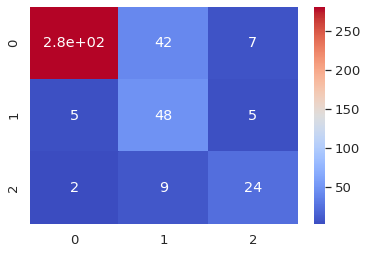

In [ ]:
y_test_pred = grid_search.predict(X_test)

print("--Logistic Regression--\n")

precision,recall,fscore,_ = precision_recall_fscore_support(y_test,y_test_pred,average = "weighted")
print("Accuracy: ",accuracy_score(y_test,y_test_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Square Error: ", mean_squared_error(y_test,y_test_pred))
print("R^2 Error: ", r2_score(y_test,y_test_pred))
#print("Precision : ", precision)
#print("Recall: ", recall)
#print("Fscore on test dataset:", fscore)

print("\n")
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap = "coolwarm")
plt.show()

--Support Vector Machine--

Accuracy:  0.8959810874704491
Mean Absolute Error:  0.11347517730496454
Mean Square Error:  0.13238770685579196
Precision :  0.920109319976504
Recall:  0.8959810874704491
Fscore on test dataset: 0.902956753721902




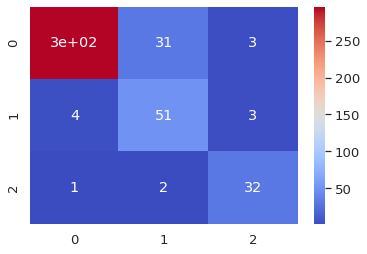

In [ ]:
y_test_pred = grid_search_svm.predict(X_test)

print("--Support Vector Machine--\n")

precision,recall,fscore,_ = precision_recall_fscore_support(y_test,y_test_pred,average = "weighted")
print("Accuracy: ",accuracy_score(y_test,y_test_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Square Error: ", mean_squared_error(y_test,y_test_pred))
#print("R^2 Error: ", r2_score(y_test,y_test_pred))
print("Precision : ", precision)
print("Recall: ", recall)
print("Fscore on test dataset:", fscore)


print("\n")
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap = "coolwarm")
plt.show()

--Random Forest--

Fscore on test dataset: 0.9812266125969995
Mean Absolute Error: 0.018912529550827423
Mean Square Error:  0.018912529550827423




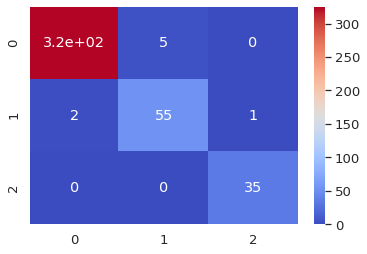

In [ ]:
y_test_pred = grid_search_forest.predict(X_test)
print("--Random Forest--\n")
print("Fscore on test dataset:", f1_score(y_test,y_test_pred,average = "weighted"))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_test_pred))
print("Mean Square Error: ", mean_squared_error(y_test,y_test_pred))

print("\n")
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap = "coolwarm")
plt.show()